# Combine the ERA5-Land Temperature, KNMI Potential Evaporation, and NRR Precipitation datasets

This Notebook combines the preprocessed NRR, KNMI and ERA5 datasets to one forcing dataset. This dataset contains the precipitation, potential evaporation and temperature radardata.

## Import required package

In [1]:
import xarray as xr

## Open the datasets

* NRR_cal: Precipitation dataset in the calibration period
* T_cal: Temperature dataset in the calibration period
* NRR_val: Precipitation dataset in the validation period
* T_val: Temperature dataset in the validation period
* PEV: Potential Evaporation dataset in the calibration and validation period

In [2]:
NRR_cal = xr.open_dataset(r"C:\Users\924259\Documents\NRR_output_calibration\NRR_data_calibration_adjusted.nc")
T_cal = xr.open_dataset(r"C:\Users\924259\OneDrive - Royal HaskoningDHV\Documents\Master thesis Daan Idsinga\Data\Potential Evaporation and Temperature - ERA5\data_calibration_adjusted.nc")

NRR_val = xr.open_dataset(r"C:\Users\924259\Documents\NRR_output_validation\NRR_data_validation_adjusted.nc")
T_val = xr.open_dataset(r"C:\Users\924259\OneDrive - Royal HaskoningDHV\Documents\Master thesis Daan Idsinga\Data\Potential Evaporation and Temperature - ERA5\data_validation_adjusted.nc")

PEV = xr.open_dataset(r"C:\Users\924259\OneDrive - Royal HaskoningDHV\Documents\Master thesis Daan Idsinga\Data\Potential Evaporation and Temperature - ERA5\Maastricht_radar.nc")

## Inspect the NRR precipitation dataset

In [3]:
NRR_cal

<xarray.Dataset>
Dimensions:        (band: 1, time: 13129, y: 33, x: 50)
Coordinates:
  * band           (band) int32 1
  * time           (time) datetime64[ns] 2019-01-01 ... 2020-07-01
  * y              (y) float64 50.92 50.91 50.9 50.89 ... 50.67 50.66 50.65
  * x              (x) float64 5.718 5.727 5.735 5.743 ... 6.11 6.118 6.127
Data variables:
    spatial_ref    (time) int32 ...
    precipitation  (time, band, y, x) float64 ...

In [4]:
NRR_val

<xarray.Dataset>
Dimensions:        (band: 1, time: 15337, y: 33, x: 50)
Coordinates:
  * band           (band) int32 1
  * time           (time) datetime64[ns] 2020-07-01 ... 2022-04-01
  * y              (y) float64 50.92 50.91 50.9 50.89 ... 50.67 50.66 50.65
  * x              (x) float64 5.718 5.727 5.735 5.743 ... 6.11 6.118 6.127
Data variables:
    spatial_ref    (time) int32 ...
    precipitation  (time, band, y, x) float64 ...

## Inspect the ERA5 temperature dataset

In [5]:
T_cal

<xarray.Dataset>
Dimensions:                (time: 13129, y: 33, x: 50)
Coordinates:
  * time                   (time) datetime64[ns] 2019-01-01 ... 2020-07-01
  * y                      (y) float64 50.92 50.91 50.9 ... 50.67 50.66 50.65
  * x                      (x) float64 5.718 5.727 5.735 ... 6.11 6.118 6.127
Data variables:
    temperature            (time, y, x) float64 ...
    potential_evaporation  (time, y, x) float64 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-09-07 08:53:35 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [6]:
T_val

<xarray.Dataset>
Dimensions:                (time: 15337, y: 33, x: 50)
Coordinates:
  * time                   (time) datetime64[ns] 2020-07-01 ... 2022-04-01
  * y                      (y) float64 50.92 50.91 50.9 ... 50.67 50.66 50.65
  * x                      (x) float64 5.718 5.727 5.735 ... 6.11 6.118 6.127
Data variables:
    temperature            (time, y, x) float64 ...
    potential_evaporation  (time, y, x) float64 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-09-07 10:05:57 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

## Inspect the KNMI Potential Evaporation dataset

First, select the timeframes of the calibration and validation periods.

In [7]:
PEV_cal = PEV.sel(time=slice('2019-01-01','2020-07-01T00:00:00'))
PEV_val = PEV.sel(time=slice('2020-07-01','2022-04-01T00:00:00'))

In [8]:
PEV_val

<xarray.Dataset>
Dimensions:                (time: 15337, y: 33, x: 50)
Coordinates:
  * time                   (time) datetime64[ns] 2020-07-01 ... 2022-04-01
  * y                      (y) float64 50.92 50.91 50.9 ... 50.67 50.66 50.65
  * x                      (x) float64 5.718 5.727 5.735 ... 6.11 6.118 6.127
Data variables:
    potential_evaporation  (time, y, x) float64 ...
Attributes:
    units:    mm/h

### Check data

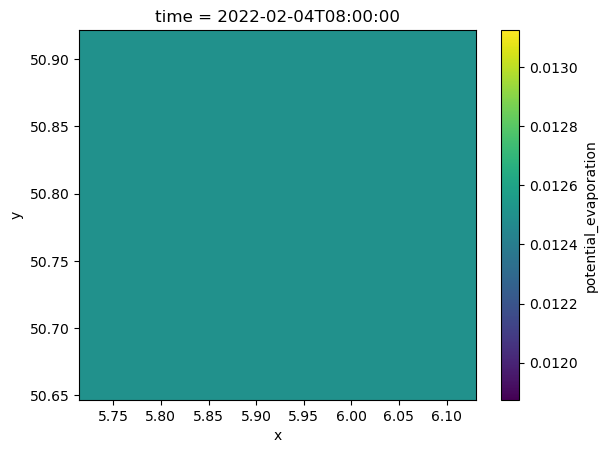

In [9]:
PEV_val.potential_evaporation.isel(time=14000).plot()

## Merge the datasets

The datasets are merged to create a calibration and validation forcing dataset.

In [10]:
Merging_cal = [NRR_cal, T_cal.temperature, PEV_cal]
Merging_val = [NRR_val, T_val.temperature, PEV_val]

In [11]:
ds_cal = xr.merge(Merging_cal)
ds_val = xr.merge(Merging_val)

## Inspect the forcing dataset

In [12]:
ds_val

<xarray.Dataset>
Dimensions:                (band: 1, time: 15337, y: 33, x: 50)
Coordinates:
  * band                   (band) int32 1
  * time                   (time) datetime64[ns] 2020-07-01 ... 2022-04-01
  * y                      (y) float64 50.92 50.91 50.9 ... 50.67 50.66 50.65
  * x                      (x) float64 5.718 5.727 5.735 ... 6.11 6.118 6.127
Data variables:
    spatial_ref            (time) int32 ...
    precipitation          (time, band, y, x) float64 ...
    temperature            (time, y, x) float64 ...
    potential_evaporation  (time, y, x) float64 ...

## Download the forcing dataset

In [13]:
ds_cal.to_netcdf(r"C:\Users\924259\OneDrive - Royal HaskoningDHV\Documents\Master thesis Daan Idsinga\Data\data_calibration.nc")
ds_val.to_netcdf(r"C:\Users\924259\OneDrive - Royal HaskoningDHV\Documents\Master thesis Daan Idsinga\Data\data_validation.nc")